## Linear Regression with R

The dataset : https://www.kaggle.com/mohansacharya/graduate-admissions

The Content : 

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

### Imports

In [1]:
library(namespace)
registerNamespace('psy', loadNamespace('psych'))
library(ggplot2)
library(reshape2)
library(lattice)
registerNamespace('ml', loadNamespace('caret'))
registerNamespace('metrics', loadNamespace('Metrics'))
registerNamespace('mlmetrics', loadNamespace('MLmetrics'))
library("IRdisplay")

<environment: namespace:psych>

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<environment: namespace:caret>

<environment: namespace:Metrics>

<environment: namespace:MLmetrics>

In [36]:
csv <- read.csv("Admission_Predict.csv", header = TRUE)
head(csv[,2:ncol(csv)])

GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
337,118,4,4.5,4.5,9.65,1,0.92
324,107,4,4.0,4.5,8.87,1,0.76
316,104,3,3.0,3.5,8.00,1,0.72
322,110,3,3.5,2.5,8.67,1,0.80
314,103,2,2.0,3.0,8.21,0,0.65
330,115,5,4.5,3.0,9.34,1,0.90


### Data Understanding

#### Univariate Analysis

In [3]:
summ <- psy::describe(csv[,2:ncol(csv)])
summ[,1:(ncol(summ)%/%2 + 1)]

,vars,n,mean,sd,median,trimmed,mad
GRE.Score,1,400,316.807500,11.4736461,317.00,316.8500000,11.860800
TOEFL.Score,2,400,107.410000,6.0695138,107.00,107.3281250,5.930400
University.Rating,3,400,3.087500,1.1437281,3.00,3.0656250,1.482600
SOP,4,400,3.400000,1.0068686,3.50,3.4296875,0.741300
LOR,5,400,3.452500,0.8984775,3.50,3.4625000,0.741300
CGPA,6,400,8.598925,0.5963171,8.61,8.6024687,0.667170
Research,7,400,0.547500,0.4983620,1.00,0.5593750,0.000000
Chance.of.Admit,8,400,0.724350,0.1426093,0.73,0.7309688,0.133434


In [4]:
summ[,(ncol(summ)%/%2 + 1):ncol(summ)]

,mad,min,max,range,skew,kurtosis,se
GRE.Score,11.860800,290.00,340.00,50.00,-0.06242254,-0.7181786,0.573682306
TOEFL.Score,5.930400,92.00,120.00,28.00,0.05678751,-0.5985838,0.303475689
University.Rating,1.482600,1.00,5.00,4.00,0.16997797,-0.8123104,0.057186406
SOP,0.741300,1.00,5.00,4.00,-0.27369641,-0.6937320,0.050343432
LOR,0.741300,1.00,5.00,4.00,-0.10619038,-0.6808341,0.044923877
CGPA,0.667170,6.80,9.92,3.12,-0.06549644,-0.4803728,0.029815855
Research,0.000000,0.00,1.00,1.00,-0.19014793,-1.9687469,0.024918099
Chance.of.Admit,0.133434,0.34,0.97,0.63,-0.35080166,-0.4122290,0.007130467


We can see that :
* For each Variable except Research, the mean and median are quite the same : it means that there are no outliers which make mean varying much. Then, we conclude that since Reseach mean is near 0.54 and median 1., there are a lot of outliers values (near 0) which tend to attract mean.
* The standard deviation is rather small for some variable comparing to their range of values, meaning that this variable has quite regrouped individuals values. 
* here is a quick interpretation of the kurtosis values (coming from 'https://fr.wikipedia.org/wiki/Kurtosis#:~:text=En%20th%C3%A9orie%20des%20probabilit%C3%A9s%20et,la%20distribution%20d'une%20variable') : 

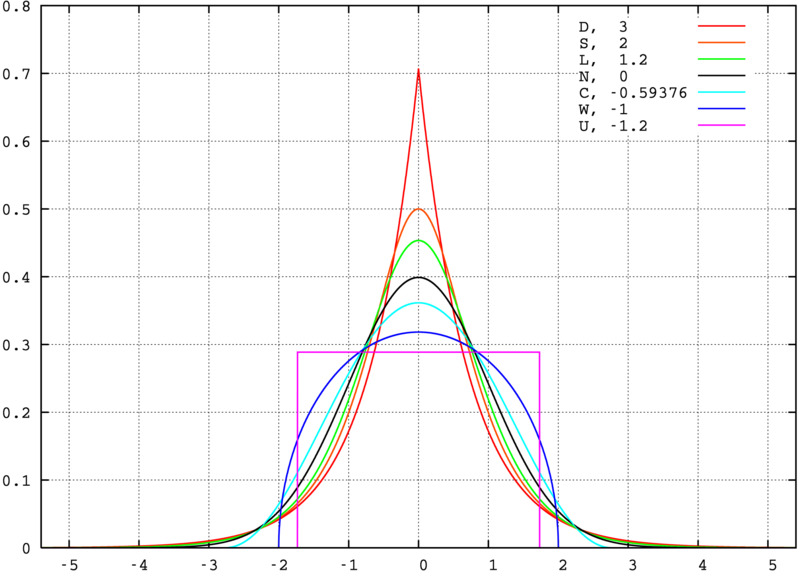

In [5]:
display_png(file="kurtosis.png") 

We can see that for example, the TOEFL.Score is near to follow a distribution Law of Cosinus (around -0.593762).

* The skew indicator helps us to know in which direction the 'tail' of the asymetric or symetric distribution is going. We will take the example of Reseach again, which confirms the fact that the low values reprsents the tail following the negative skew coefficient.

Let's check for outliers over our dataset :

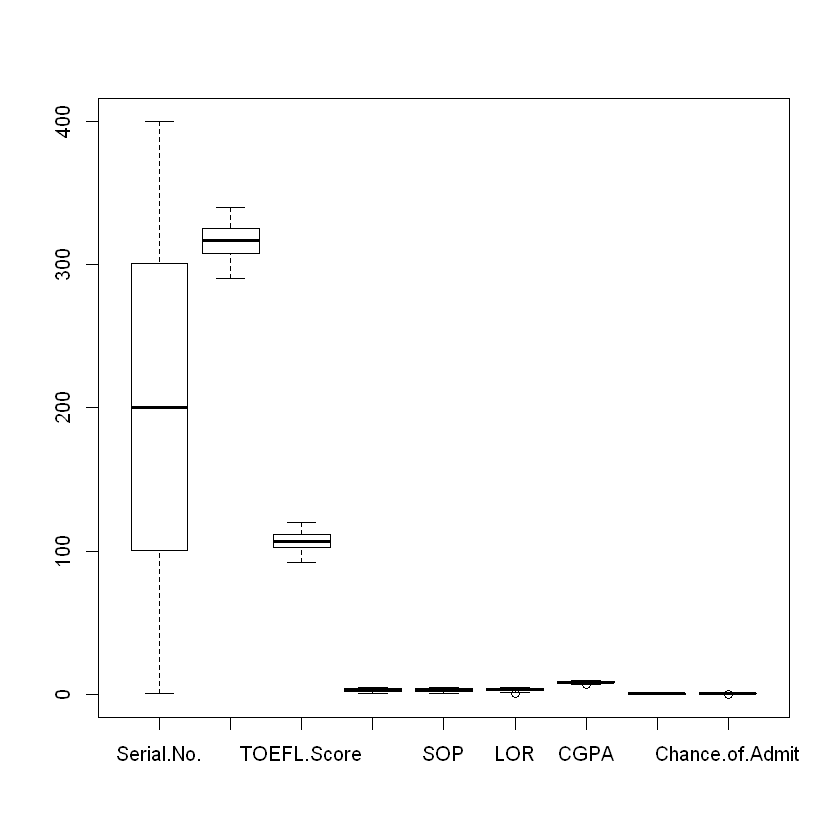

In [6]:
boxplot(csv)

Let's visualize the distribution

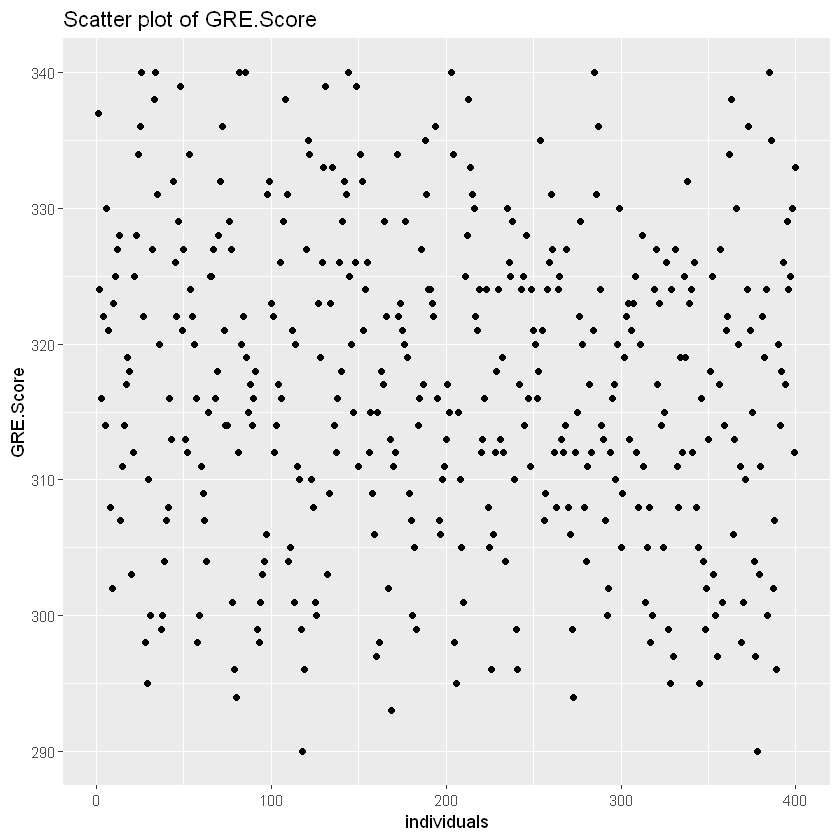

In [7]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),2])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score", 
         x = "individuals", y = "GRE.Score")

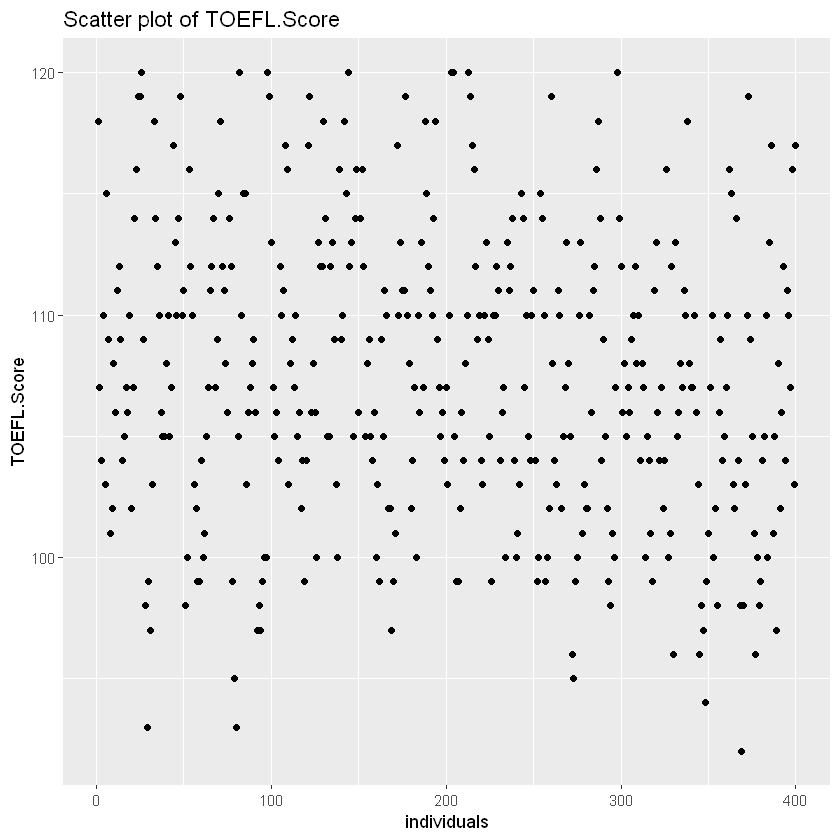

In [8]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),3])) + geom_point() + 
    labs(title = "Scatter plot of TOEFL.Score", 
         x = "individuals", y = "TOEFL.Score")

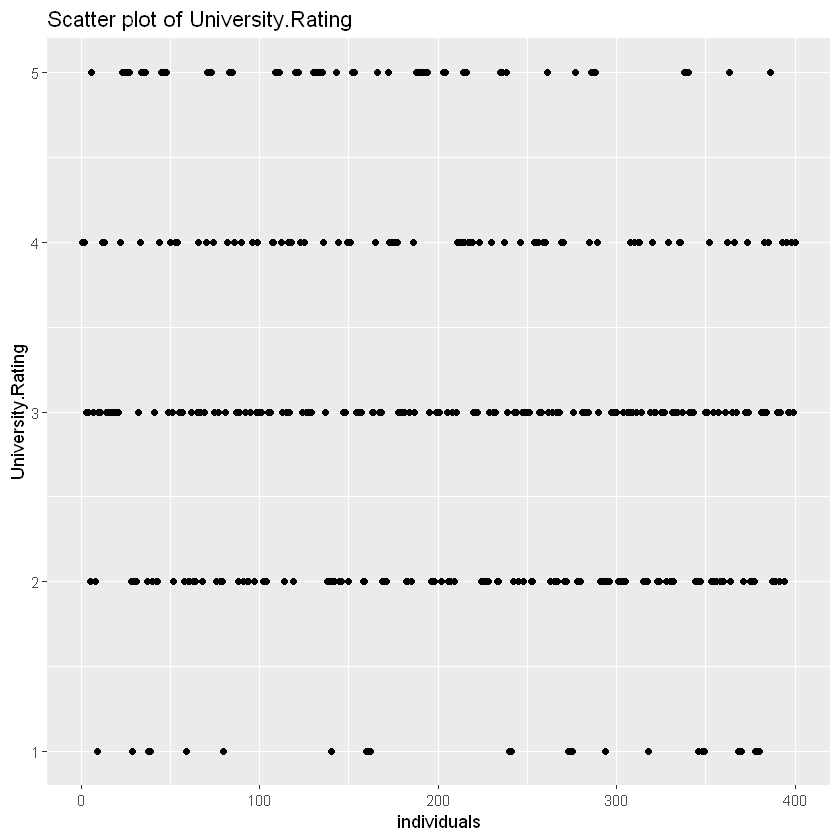

In [9]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),4])) + geom_point() + 
    labs(title = "Scatter plot of University.Rating", 
         x = "individuals", y = "University.Rating")

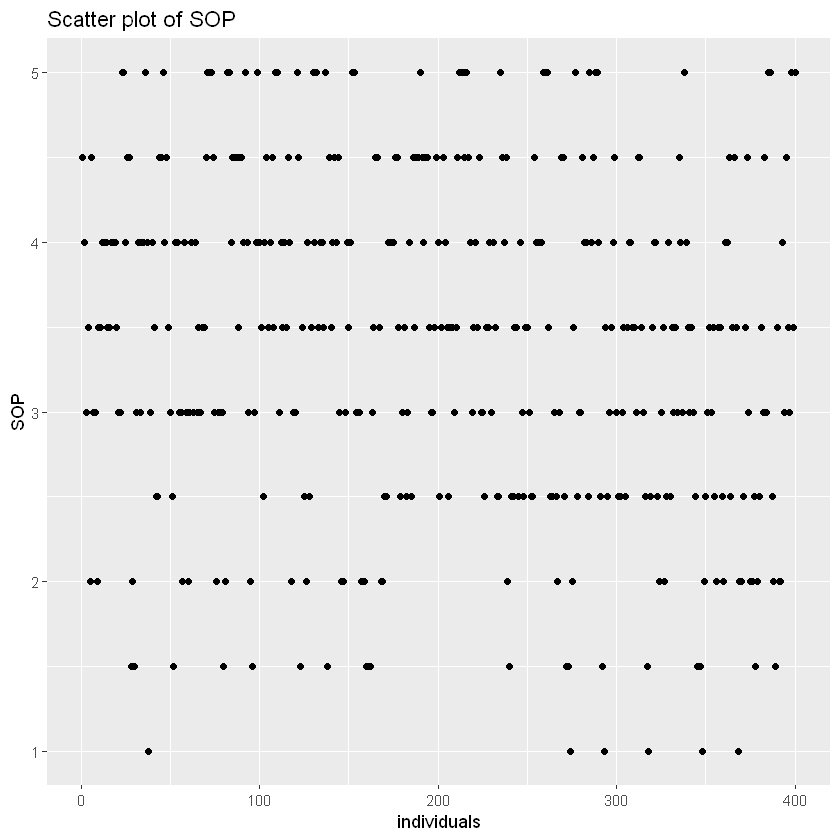

In [10]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),5])) + geom_point() + 
    labs(title = "Scatter plot of SOP", x = "individuals", y = "SOP")

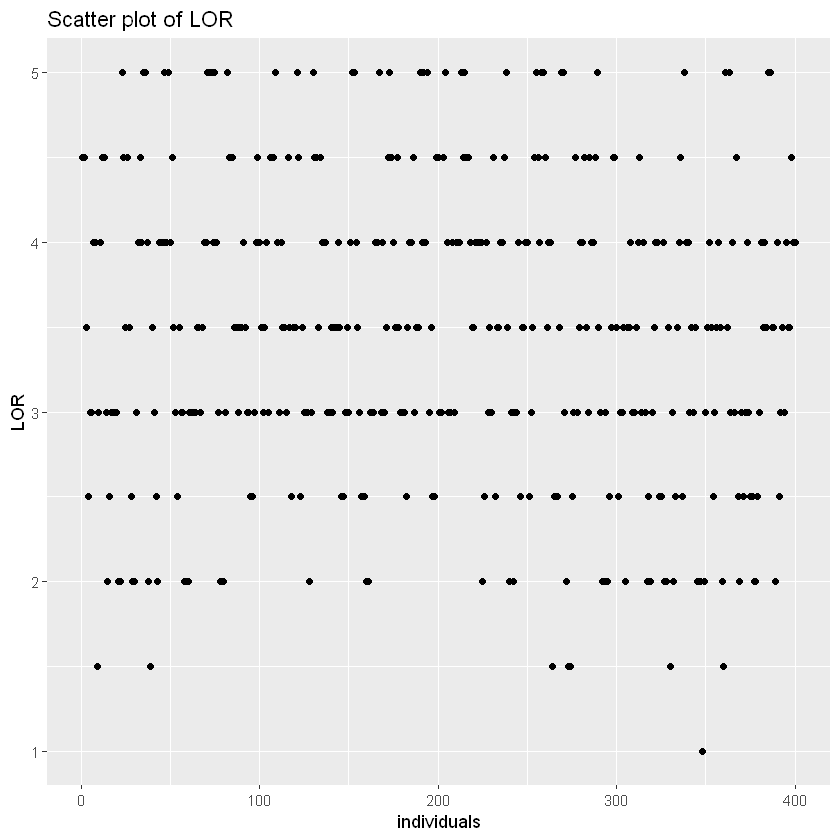

In [11]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),6])) + geom_point() + 
    labs(title = "Scatter plot of LOR", x = "individuals", y = "LOR")

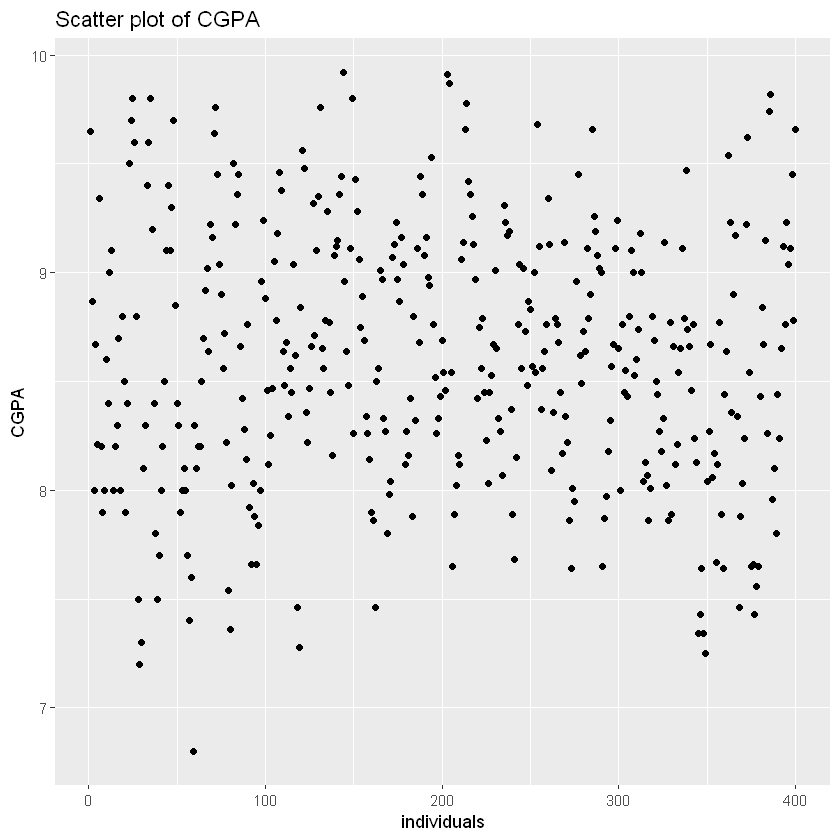

In [12]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),7])) + geom_point() + 
    labs(title = "Scatter plot of CGPA", x = "individuals", y = "CGPA")

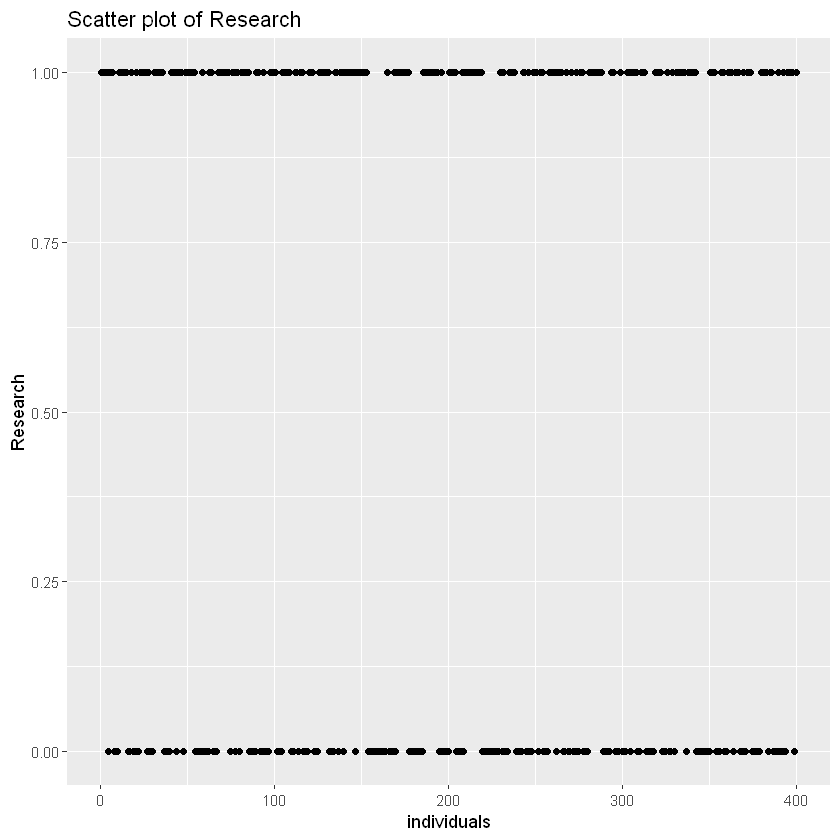

In [13]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),8])) + geom_point() + 
    labs(title = "Scatter plot of Research", x = "individuals", y = "Research")

We can see there are two methods to rank students :
* The first one deals with continuous values, ranking people with numerical data.
* The second one deals with categorical data (and more precisely ordinal data), using discrete action space.

Those plots do not really helps us to interpret more informations but rather confirms what we could have seen in the data describing.

#### Bi-variate Analysis

In [14]:
correlation_pearson_csv <- melt(cor(csv[1:nrow(csv),0:-1], 
                                    method = c("pearson")))
correlation_kendall_csv <- melt(cor(csv[1:nrow(csv),0:-1], 
                                    method = c("kendall")))
correlation_spearman_csv <- melt(cor(csv[1:nrow(csv),0:-1], 
                                     method = c("spearman")))

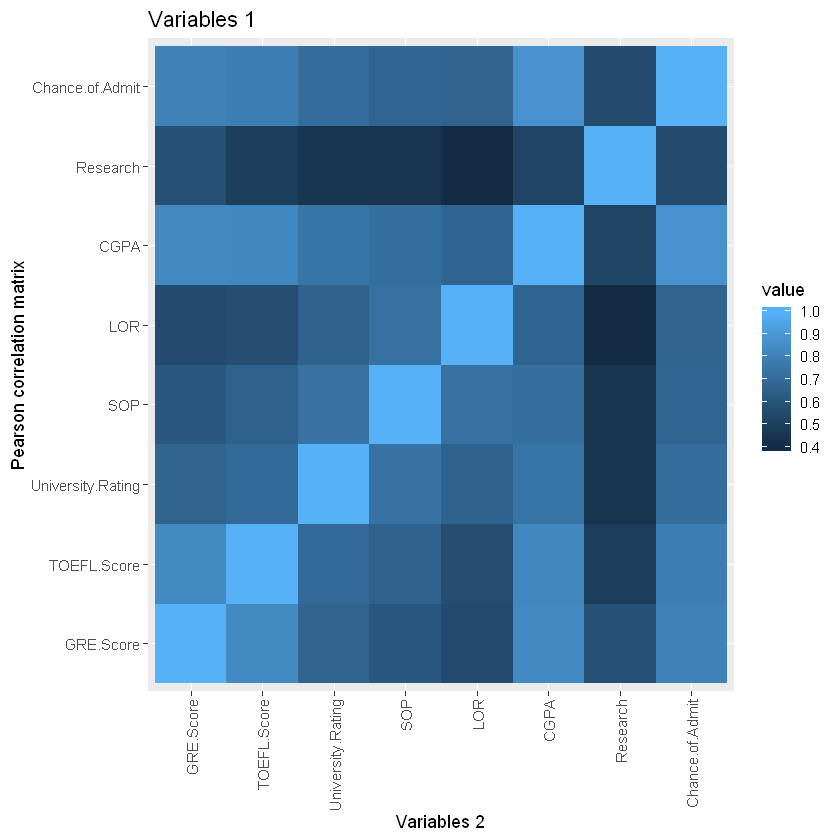

In [15]:
ggplot(data = correlation_pearson_csv, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
labs(title = "Variables 1", x = "Variables 2",
     y = "Pearson correlation matrix")

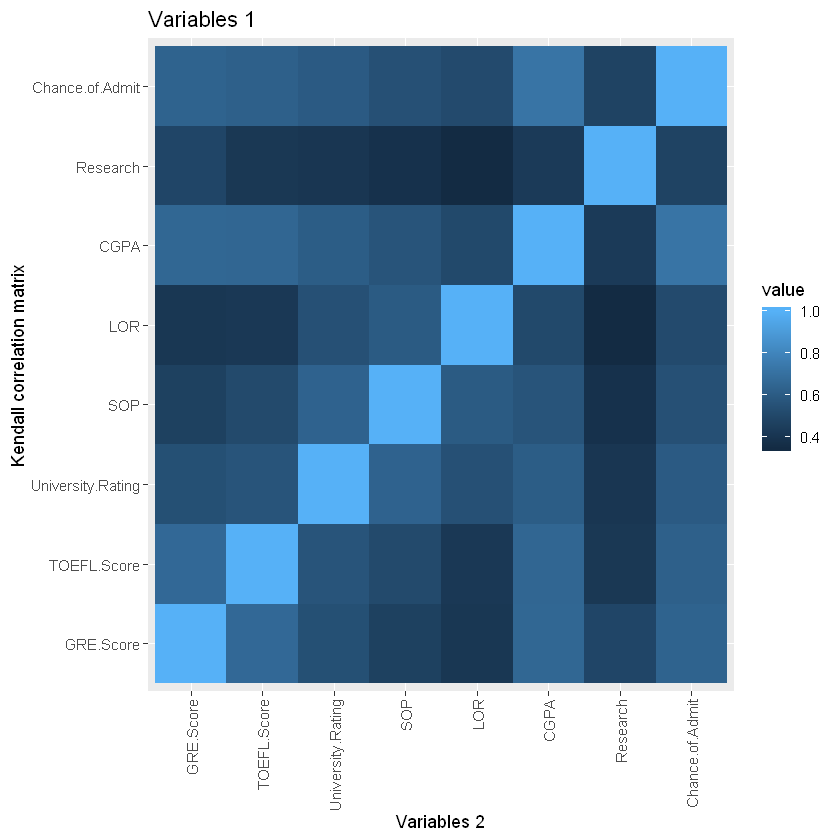

In [16]:
ggplot(data = correlation_kendall_csv, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    labs(title = "Variables 1", x = "Variables 2", 
         y = "Kendall correlation matrix")

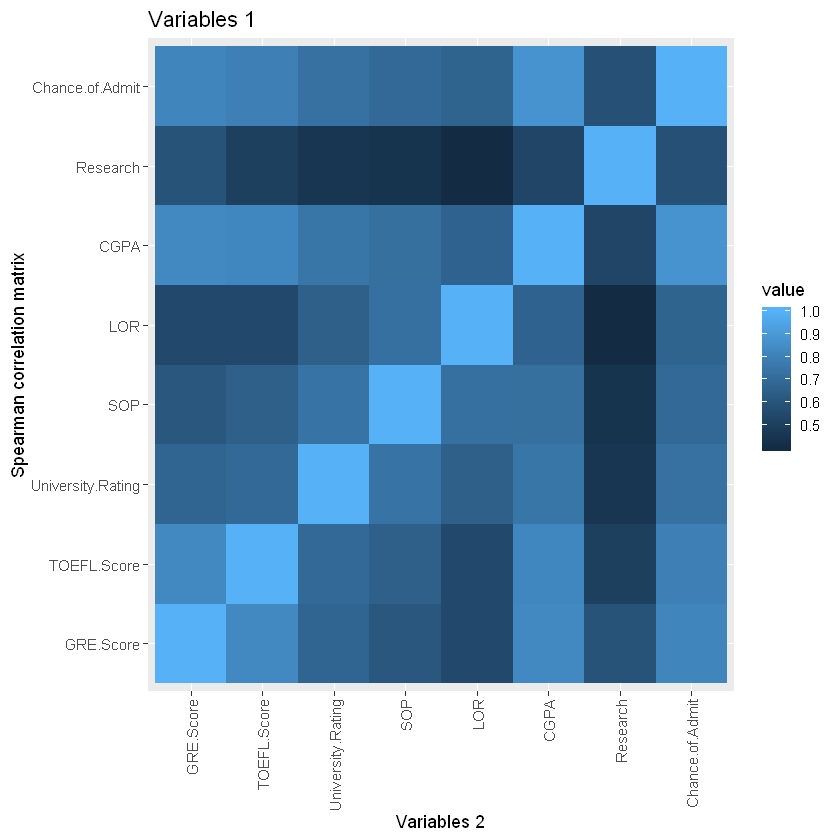

In [17]:
ggplot(data = correlation_spearman_csv, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    labs(title = "Variables 1", x = "Variables 2", 
         y = "Spearman correlation matrix")

As we can quickly see, there are some linear correlation following the 3 indicators 'Pearson, Kendall and Spearman'.

* GRE.Score, TOEFL.Score and CPGA are higly correlated one by one but also to Chance of Admits. This means that those scores higly determines the chances to be admitted by themselves.

Let's plot those variables in order to have a confirmation

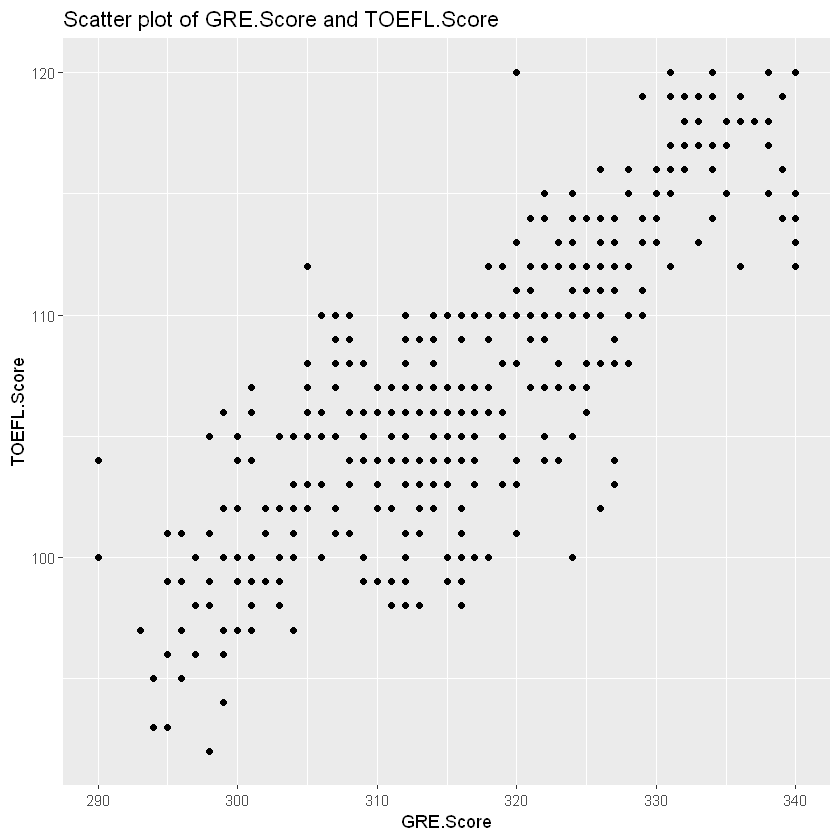

In [18]:
ggplot(csv, aes(x = csv[1:nrow(csv),2], y = csv[1:nrow(csv),3])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score and TOEFL.Score", 
         x = "GRE.Score", y = "TOEFL.Score")

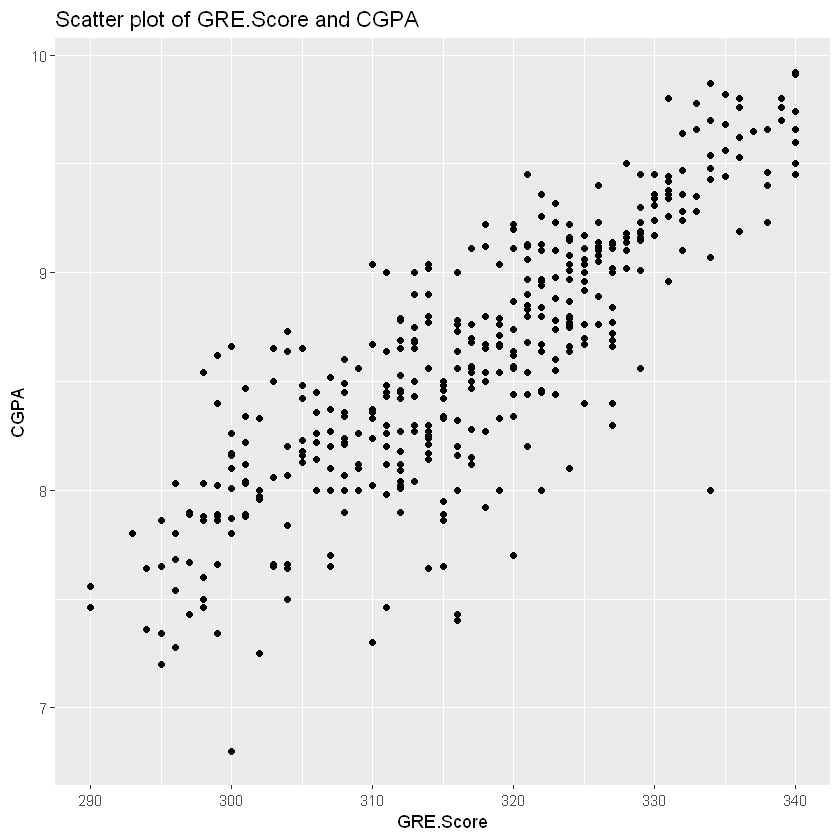

In [19]:
ggplot(csv, aes(x = csv[1:nrow(csv),2], y = csv[1:nrow(csv),7])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score and CGPA", x = "GRE.Score", 
         y = "CGPA")

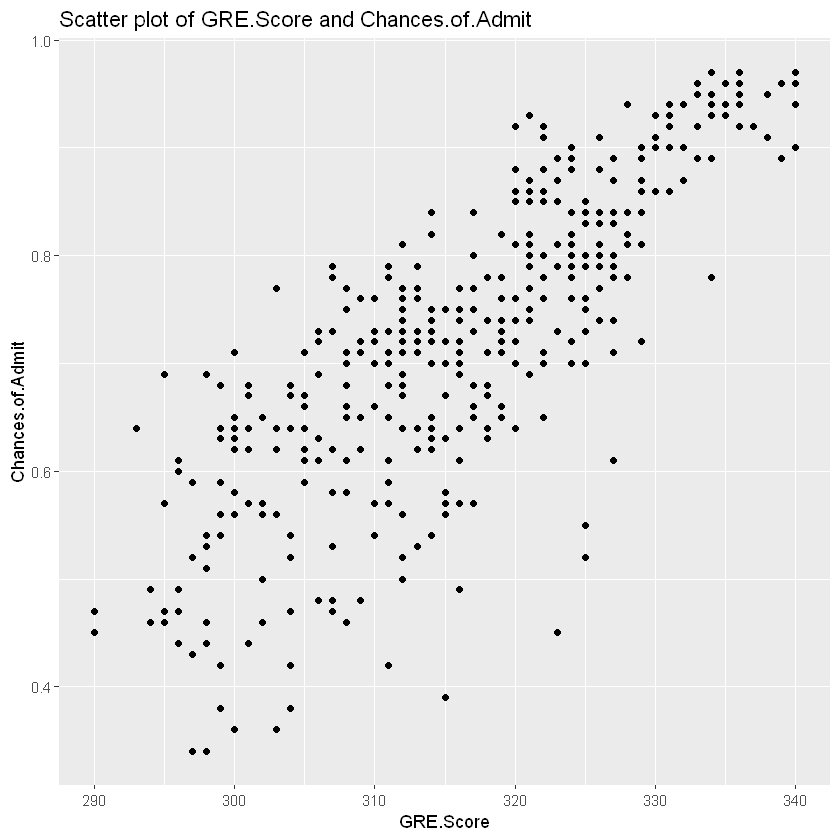

In [20]:
ggplot(csv, aes(x = csv[1:nrow(csv),2], y = csv[1:nrow(csv),9])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score and Chances.of.Admit", 
         x = "GRE.Score", y = "Chances.of.Admit")

We easily understand why linear regression could be a good approximation of this dataset seing those last plots.

We could have continued with PCA and T-SNE data reduction in order to have more comprehension over the dataset. Since it's not the aim of this exercise, we will pursue with the linear regression.

### Machine Learning

#### Re-arranging Data

In [21]:
# Data are numbers ?
str(csv)
# train/test splitting
inTrain = ml::createDataPartition(y = csv[1:nrow(csv),9], p = .80, 
                                  list = FALSE)
train_csv <- csv[inTrain,2:ncol(csv)]
test_csv <- csv[-inTrain,2:ncol(csv)]
head(train_csv)
head(test_csv)
print(paste("Train : ",nrow(train_csv)))
print(paste("Test : ",nrow(test_csv)))

'data.frame':	400 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 302 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : int  1 1 1 1 0 1 1 0 0 0 ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...


,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68


,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
10,323,108,3,3.5,3.0,8.60,0,0.45
11,325,106,3,3.5,4.0,8.40,1,0.52
12,327,111,4,4.0,4.5,9.00,1,0.84
14,307,109,3,4.0,3.0,8.00,1,0.62


[1] "Train :  322"
[1] "Test :  78"


#### Multiple Linear Regression

In [22]:
# First way of doing without any package
# linearMod <- lm(Chance.of.Admit ~ ., data=train_csv)
# summary(linearMod)

# Second way of doing using caret-lattice package
fitControl <- ml::trainControl(method = "repeatedcv", number = 3, repeats = 3)
regress <- ml::train(Chance.of.Admit ~ ., data = train_csv, 
                     method = "lm", trControl = fitControl)
summary(regress)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.236014 -0.024092  0.008138  0.034250  0.155492 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.3127672  0.1309815 -10.023  < 2e-16 ***
GRE.Score          0.0022929  0.0006172   3.715 0.000241 ***
TOEFL.Score        0.0025551  0.0011754   2.174 0.030463 *  
University.Rating  0.0069492  0.0051127   1.359 0.175054    
SOP               -0.0008679  0.0060604  -0.143 0.886218    
LOR                0.0240047  0.0060202   3.987 8.32e-05 ***
CGPA               0.1077836  0.0127819   8.432 1.25e-15 ***
Research           0.0178194  0.0084325   2.113 0.035373 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06092 on 314 degrees of freedom
Multiple R-squared:  0.8206,	Adjusted R-squared:  0.8166 
F-statistic: 205.2 on 7 and 314 DF,  p-value: < 2.2e-16


as we can see, the P-values indicates us that some of the data are quite more relevant than others as we predicted with visualization :
* LOR and CGPA have a really low p-value which means that the confidence that they predict well is high.
* GRE.Score, TOEFL.Score and Research are also usefull but with a less confidence (still really high in this case).
* University.Rating, SOP have a high p-values meaning that these are not good variables (confidence) to determines the chances of admission

In [23]:
y_pred <- predict(regress, newdata = test_csv)
y_true <- test_csv[,ncol(test_csv)]

In [24]:
print_res <- function(y_true, y_pred){
    print(paste0("RMSE => ", round(metrics::rmse(y_true, y_pred),3)))
    print(paste0("MSE  => ", round(metrics::mse(y_true, y_pred),3)))
    print(paste0("MBE  => ", round(metrics::bias(y_true, y_pred),3)))
    print(paste0("MAE  => ", round(mean(Metrics::ae(y_true, y_pred)),3)))
    print(paste0("MAPE  => ", round(mean(Metrics::ape(y_true, y_pred)),3)))
    print(paste0("R2   => ", round(mlmetrics::R2_Score(y_true, y_pred),3)))
}

In [25]:
print_res(y_true, y_pred)

[1] "RMSE => 0.075"
[1] "MSE  => 0.006"
[1] "MBE  => -0.009"
[1] "MAE  => 0.051"
[1] "MAPE  => 0.085"
[1] "R2   => 0.609"


The result are quite good on the test set, meaning that all errors indicators are quite low.

#### Support Vector Machine (SVM)

In [26]:
fitControl <- ml::trainControl(method = "repeatedcv", number = 3, repeats = 3)
svm <- ml::train(Chance.of.Admit ~ ., data = train_csv, 
                 method  = "svmLinear", trControl = fitControl)
summary(svm)

Length  Class   Mode 
     1   ksvm     S4 

In [27]:
y_pred <- predict(svm, newdata = test_csv)
y_true <- test_csv[,ncol(test_csv)]

In [28]:
print_res(y_true, y_pred)

[1] "RMSE => 0.077"
[1] "MSE  => 0.006"
[1] "MBE  => -0.02"
[1] "MAE  => 0.05"
[1] "MAPE  => 0.087"
[1] "R2   => 0.549"


The result are quite good on the test set, but not better than the basic linear regression.

#### XGBoost

In [29]:
fitControl <- ml::trainControl(method = "repeatedcv", number = 3, repeats = 3)
svm <- ml::train(Chance.of.Admit ~ ., data = train_csv, 
                 method  = "xgbTree", trControl = fitControl)
summary(svm)

              Length Class              Mode       
handle            1  xgb.Booster.handle externalptr
raw           13359  -none-             raw        
niter             1  -none-             numeric    
call              5  -none-             call       
params            8  -none-             list       
callbacks         1  -none-             list       
feature_names     7  -none-             character  
nfeatures         1  -none-             numeric    
xNames            7  -none-             character  
problemType       1  -none-             character  
tuneValue         7  data.frame         list       
obsLevels         1  -none-             logical    
param             0  -none-             list       

In [30]:
y_pred <- predict(svm, newdata = test_csv)
y_true <- test_csv[,ncol(test_csv)]

In [31]:
print_res(y_true, y_pred)

[1] "RMSE => 0.079"
[1] "MSE  => 0.006"
[1] "MBE  => -0.011"
[1] "MAE  => 0.054"
[1] "MAPE  => 0.091"
[1] "R2   => 0.592"


The result are quite good on the test set, but not better than the basic linear regression.